In [1]:
%matplotlib inline
from __future__ import print_function, division
from nilmtk import DataSet
import numpy as np
import pandas as np
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16.0, 8.0)
import matplotlib.pyplot as plt
import sys

In [2]:
dataset = DataSet('/data/mine/vadeec/merged/ukdale.h5')
dataset.set_window('2013-01-01', '2013-01-02')
elec = dataset.buildings[1].elec
appliance = elec['washer dryer']
activations = appliance.activation_series()

In [3]:
activations[0]
activation = activations[0].dropna().values

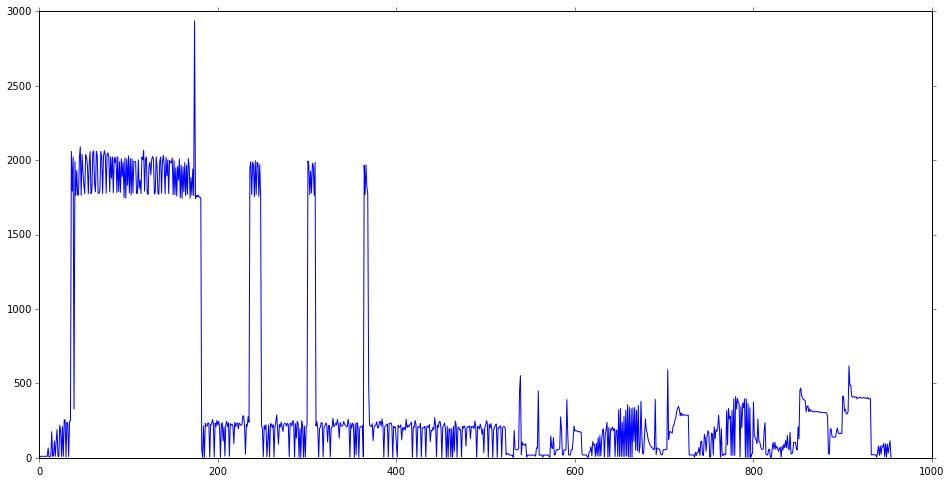

In [4]:
plt.plot(activation);

In [8]:
from neuralnilm.rectangulariser import rectangularise

In [13]:
segments = rectangularise(activation, n_segments=10)
segments

array([ 0.03769634,  0.15287958,  0.0565445 ,  0.01361257,  0.05445026,
        0.00942408,  0.0565445 ,  0.00628272,  0.50471204,  0.1078534 ])

In [15]:
changepoints = [0]
for segment in segments:
    changepoint = changepoints[-1] + int(round((segment * len(activation))))
    changepoints.append(changepoint)

In [16]:
changepoints

[0, 36, 182, 236, 249, 301, 310, 364, 370, 852, 955]

(0, 955)

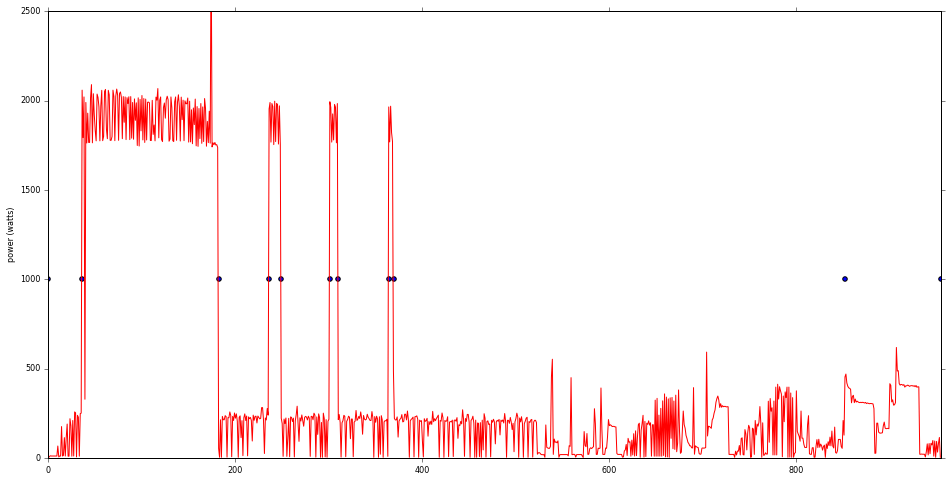

In [17]:
fig, ax1 = plt.subplots()
ax1.plot(activation, 'r')
ax1.set_ylabel('power (watts)')
ax1.scatter(changepoints, [1000] * len(changepoints))
ax1.set_ylim((0, 2500))
ax1.set_xlim((0, len(activation)))